In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url= input("Enter download link(.csv format) of tournament results:")
df=pd.read_csv(url)
reg=pd.DataFrame()

Enter download link(.csv format) of tournament results:https://lichess.org/api/tournament/GIbTqghJ/results?as=csv


In [ ]:
print("Type 1 and press enter: If you have list of registered players.")
print("Type any other key and press enter: If you are here just for analysis")
ni=0
if input()=='1':
  print("Enter the list of Lichess usernames of registered players.Just copy the entire LichessUsername column from excel and paste here and tap enter key.")
  re2=input()
  reg['username']=re2.split()
else:
  reg['username']=df['Username']
  ni=1
  
import numpy as np
reg['username']=reg['username'].str.upper()
print("These are the tasks you can perform now."+'\n')
print("1:Get list of unregistered players."+'\n'+"2:Calculate Final scores of top 20 players of all teams after removing unregistered players"+'\n'+"3:Get list of doubtful and confirmed sandbaggers"+'\n'+"4:Graphical analysis of scores"+'\n'+"5.Prediction of future score and performance of a player.")
print("Type numbers written before the tasks you want to perform and press enter. For example- If you want to perform task number 1, 2 and 4: Type 124 and press enter.")
x=input()

if '1' in str(x):
  unreg=set(df['Username'].str.upper()).difference(reg['username'])
  unreg_rows=df[(df['Username'].str.upper()).isin(unreg)]
  print("Excel list of unregistered players has been saved to your disk! Search for UnregisteredPlayersList.csv in your root directory."+'\n')
  unreg_rows.to_csv('/UnregisteredPlayersList.csv')

if '2' in str(x):
  un=set(df['Username'].str.upper()).difference(reg['username'])
  reg_rows=df[~(df['Username'].str.upper()).isin(un)]
  a=0
  df1=pd.DataFrame()
  for t in reg_rows['Team'].unique():
    df1.loc[a,"Team"]=t
    df1.loc[a,"Score"]=reg_rows[reg_rows['Team']==t].head(20)["Score"].sum()  
    a=a+1
  print("Updated scores of 20 players of teams after removing unregistered players are:"+'\n')  
  print(df1.sort_values("Score",ascending=False).set_index("Team"))

if '3' in str(x):
  print("List of confirmed sandbaggers(amongst the top 20 players of each team) are given below. Immediately report them!!"+'\n')
  df2=pd.DataFrame()
  df3=pd.DataFrame()
  df4=pd.DataFrame()
  if ni==0:
   for t in df['Team'].unique():
     df2=df2.append(df[df['Team']==t].head(20))
  else:
    df2=df     
  df4=df2[df2['Performance']-df2['Rating']>=500]
  df4=df4.set_index("Rank").drop(columns=['Title'])
  df4=df4.sort_values("Score",ascending=False)
  print(df4)
  print('\n'+"List of doubtful sandbaggers(amongst the top 20 players of each team) are given below. Check them!!"+'\n')
  df3=df2[np.logical_and(df2['Performance']-df2['Rating']>=300,df2['Performance']-df2['Rating']<500)]
  df3=df3.set_index("Rank").drop(columns=['Title'])
  df3=df3.sort_values("Score",ascending=False)
  print(df3)
  print("Is dataset too large for output shell to show?? \n Type 1 and press enter: To save the lists to your root directory, Else type any other key to continue.")
  if input()=='1':
    df4.to_csv('/ConfirmedSandbaggers.csv')
    df3.to_csv('/DoubtfulSandbaggers.csv')



Type 1 and press enter: If you have list of registered players.
Type any other key and press enter: If you are here just for analysis
1
Enter the list of Lichess usernames of registered players.Just copy the entire LichessUsername column from excel and paste here and tap enter key.
PhoenixGolem Ashrith_07 YagamiLight21 Punitlohia7 lavyadhawan2002 Auri2KY punyagupta parth3108 Ryuzaki_7 Karn_98 kristine_queen Gamechanger9870 Deny_Warrior NitMan2 Deepakbitu Noah235 PositionDisposition SteerioLp Master_mind1 shivam268 RRISHABH2112 shreyan61 vikas99 gks2021 Noob_Ac sumit1136 Chess_terminator12 Devagarwal Pawan_26 Helix77 Vrishan AmanSingh142 Deepak767207 samarthsomani harshwardhantanwar SaiSarath_17 KishnaPrakash SkillGod Deepak_kr krishnakittu242 Deepti_Gupta vaishnavi0903 Maverick2205 ConceptualAjay191 S_D_24 Sheldor2322 Ankush_Jaiswal_20 satendrachess ParasHarsule_10 sicario7 Timepass71 Vaibhav6391 Iwarrior19 lazy_pawn_3301 shashwat_12 aditya314159 sandeep_bollepally3 Kalpit_77 sl12335 A

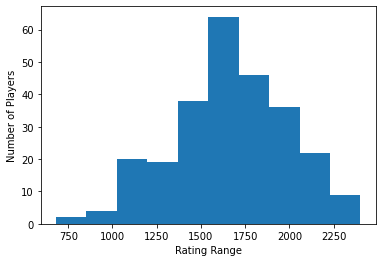

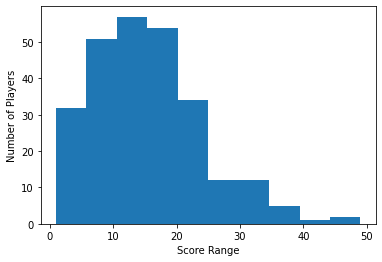

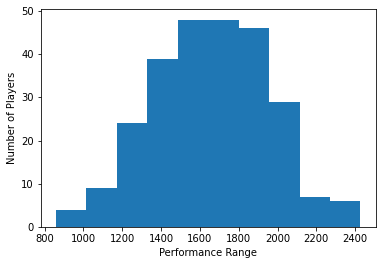

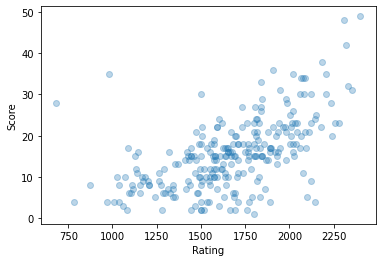

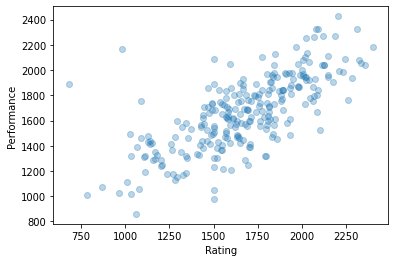

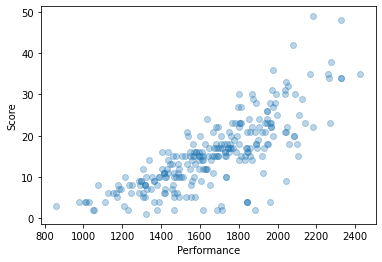

In [ ]:
df5=pd.DataFrame()
df5=df[df['Score']!=0]
df5 = df5.drop(columns=['Rank','Username','Title','Team'])
if '4' in str(x):
 from matplotlib import pyplot as plt
 plt.hist(df5['Rating'])
 plt.xlabel('Rating Range')
 plt.ylabel('Number of Players')
 plt.show()
 plt.clf()
 plt.hist(df5['Score'])
 plt.xlabel('Score Range')
 plt.ylabel('Number of Players')
 plt.show()
 plt.clf()
 plt.hist(df5['Performance'])
 plt.xlabel('Performance Range')
 plt.ylabel('Number of Players')
 plt.show()
 plt.clf()
 plt.scatter(df5['Rating'],df5['Score'],alpha=0.3)
 plt.xlabel('Rating')
 plt.ylabel('Score')
 plt.show()
 plt.clf()
 plt.scatter(df5['Rating'],df5['Performance'],alpha=0.3)
 plt.xlabel('Rating')
 plt.ylabel('Performance')
 plt.show()
 plt.clf()
 plt.scatter(df5['Performance'],df5['Score'],alpha=0.3)
 plt.xlabel('Performance')
 plt.ylabel('Score')
 plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


#RemovingUnexpectedPerformances
cc=pd.DataFrame()
cc=df5[np.abs(df5['Performance']-df5['Rating'])<=200]
cc = cc.values

# Segregate features and labels into separate variables
X,y = cc[:,0].reshape(-1,1) , cc[:,2].reshape(-1,1)

# Split into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
# function to get 5 fold cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))

CV Mean:  0.844266921299871
STD:  0.016953932983508852
0.852303609658308


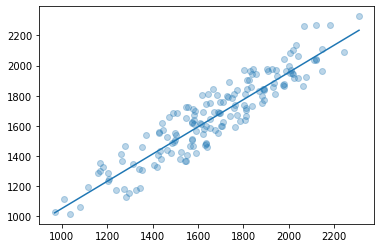

[[1954.56504266]]


In [ ]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)
print(lr.score(X_test,y_test))
myline = np.linspace(X.min(), X.max(), 100)

plt.scatter(X, y,alpha=0.3)
plt.plot(myline, lr.predict(myline.reshape(-1,1)))
plt.show()
print(lr.predict(np.array([2000]).reshape(-1,1)))

In [ ]:
from sklearn.linear_model import ElasticNet
# find optimal alpha with grid search
from sklearn.model_selection import GridSearchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
elastic_net=ElasticNet()
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.8442685985105569
Best Params:  {'alpha': 100, 'l1_ratio': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614136.0962443558, tolerance: 842.341155172414
  positive)


In [ ]:
cc1=pd.DataFrame()
df6=pd.DataFrame()
df6=df5[np.abs(df5['Performance']-df5['Rating'])<=200]
for h in range(0,4000):
 b=np.logical_and(df6['Performance']>h,df6['Performance']<=(h+200))
 cc1=cc1.append(df6[b].head(int(len(df6[b]['Performance'])/2)+1))
 h=h+200
cc1=cc1.drop_duplicates()
print(cc1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 244 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       59 non-null     int64  
 1   Score        59 non-null     int64  
 2   Performance  59 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.8 KB
None


0.9244832814476464


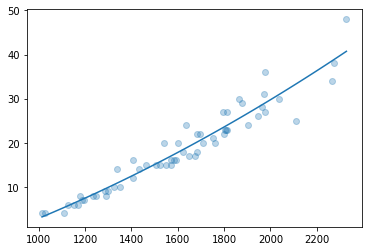

In [ ]:
cc1=cc1.values
# Segregate features and labels into separate variables
a1,b1 = cc1[:,2] , cc1[:,1]
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(a1,b1 ,deg=2))
print(r2_score(b1, mymodel(a1)))
myline = np.linspace(a1.min(), a1.max(), 100)

plt.scatter(a1, b1,alpha=0.3)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
if '5' in str(x):
  r=input("Enter Rating of the player:")
  p=lr.predict(np.array([int(r)]).reshape(-1,1))
  print("Performance of the player in similar future tournament will be nearly: "+str(int(p))+'\n')
  print("And score will be: "+str(int(mymodel(p))))
  print('\n'+"Note: Above predictions are approximate and may differ if the player performs slightly good or bad!")

Enter Rating of the player:2000
Performance of the player in similar future tournament will be nearly: 1954

And score will be: 28

Note: Above predictions are approximate and may differ if the player performs slightly good or bad!
